# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [18]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [19]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [20]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [21]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

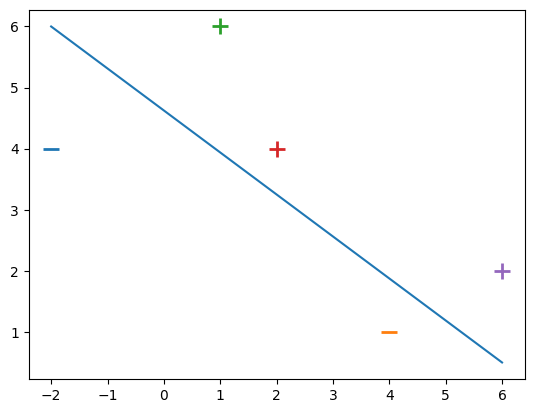

In [22]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

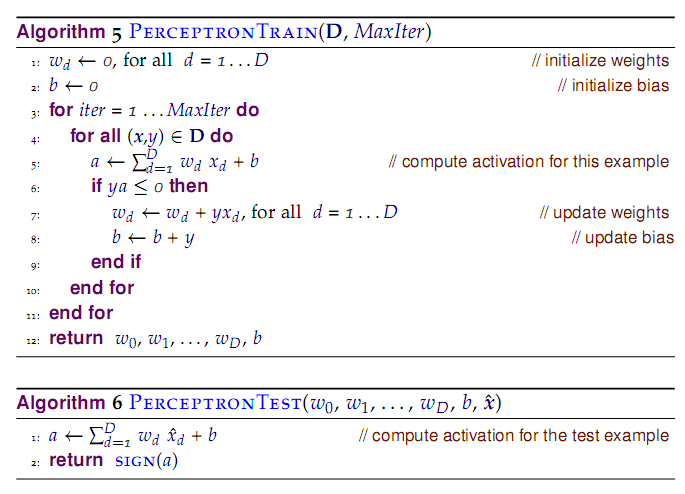

The algorithm is shown in the above image.

In [23]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [24]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

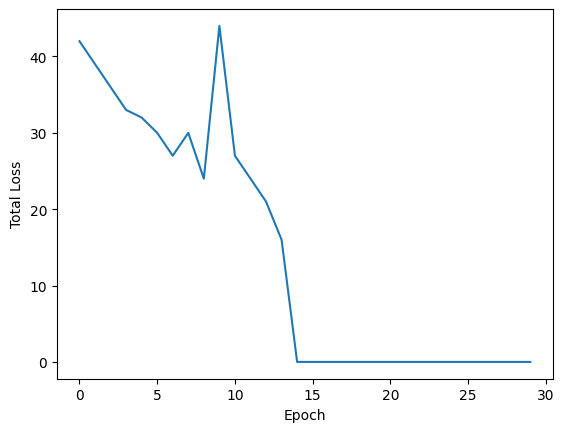

In [25]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

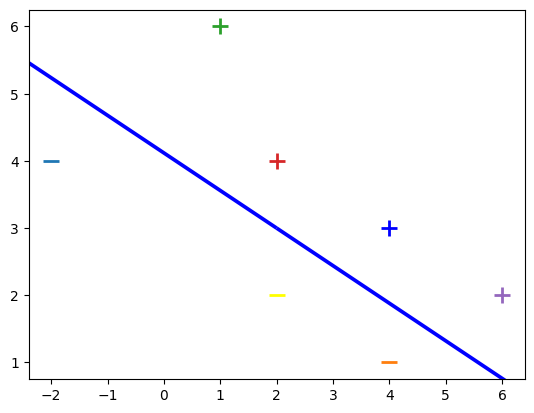

In [26]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [27]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [28]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


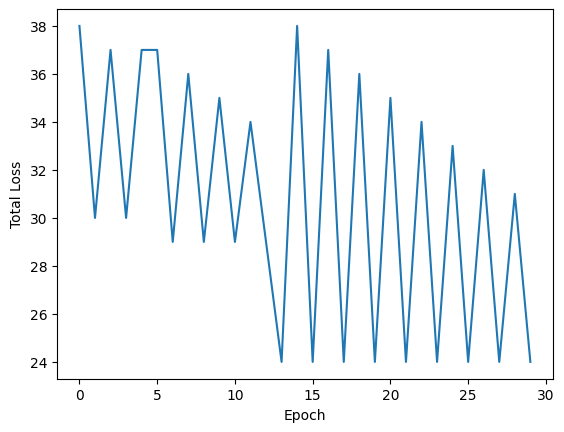

In [29]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.



## **Question 1: AND Function Learning with Perceptron**

**Answer:** The AND boolean function is definitely learnable by a Perceptron because it is linearly separable. The AND function returns 1 (positive class) only when both inputs are 1, and returns 0 (negative class) in all other cases. This creates a clear linear boundary that can separate the positive and negative classes in the 2D input space.

**Analysis:**
• The AND function is linearly separable - we can draw a straight line to separate the single positive case (1,1) from the three negative cases (0,0), (0,1), (1,0)
• Starting with w0 = 0 and b0 = 0, the perceptron will iteratively update weights using the rule: w(t+1) = w(t) + y(i) * x(i) when misclassified
• The algorithm will converge to a solution that correctly classifies all training examples
• A typical solution might be weights like w1 = 1, w2 = 1, bias = -1.5, giving the decision boundary: x1 + x2 - 1.5 > 0

In [30]:
# Code Example: Learning AND Function with Perceptron
import numpy as np
import matplotlib.pyplot as plt

# AND function dataset
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([-1, -1, -1, 1])  # Only (1,1) is positive

def perceptron_and_demo(X, y, learning_rate=1.0, max_epochs=10):
    # Initialize weights and bias to 0 as specified
    w = np.array([0.0, 0.0])
    b = 0.0
    
    print("Learning AND function with Perceptron")
    print("Initial: w =", w, ", b =", b)
    print("\nIteration details:")
    
    for epoch in range(max_epochs):
        errors = 0
        print(f"\nEpoch {epoch + 1}:")
        
        for i, (x, target) in enumerate(zip(X, y)):
            # Calculate prediction
            activation = np.dot(w, x) + b
            prediction = 1 if activation > 0 else -1
            
            # Update if misclassified
            if prediction != target:
                print(f"  Input {x}, Target: {target}, Predicted: {prediction} -> UPDATE")
                w += learning_rate * target * x
                b += learning_rate * target
                print(f"  New weights: w = {w}, b = {b:.1f}")
                errors += 1
            else:
                print(f"  Input {x}, Target: {target}, Predicted: {prediction} -> Correct")
        
        if errors == 0:
            print(f"\nConverged after {epoch + 1} epochs!")
            break
    
    return w, b

# Train perceptron
final_w, final_b = perceptron_and_demo(X_and, y_and)
print(f"\nFinal weights: w1 = {final_w[0]}, w2 = {final_w[1]}, bias = {final_b}")
print(f"Decision boundary: {final_w[0]}*x1 + {final_w[1]}*x2 + {final_b} > 0")

Learning AND function with Perceptron
Initial: w = [0. 0.] , b = 0.0

Iteration details:

Epoch 1:
  Input [0 0], Target: -1, Predicted: -1 -> Correct
  Input [0 1], Target: -1, Predicted: -1 -> Correct
  Input [1 0], Target: -1, Predicted: -1 -> Correct
  Input [1 1], Target: 1, Predicted: -1 -> UPDATE
  New weights: w = [1. 1.], b = 1.0

Epoch 2:
  Input [0 0], Target: -1, Predicted: 1 -> UPDATE
  New weights: w = [1. 1.], b = 0.0
  Input [0 1], Target: -1, Predicted: 1 -> UPDATE
  New weights: w = [1. 0.], b = -1.0
  Input [1 0], Target: -1, Predicted: -1 -> Correct
  Input [1 1], Target: 1, Predicted: -1 -> UPDATE
  New weights: w = [2. 1.], b = 0.0

Epoch 3:
  Input [0 0], Target: -1, Predicted: -1 -> Correct
  Input [0 1], Target: -1, Predicted: 1 -> UPDATE
  New weights: w = [2. 0.], b = -1.0
  Input [1 0], Target: -1, Predicted: 1 -> UPDATE
  New weights: w = [1. 0.], b = -2.0
  Input [1 1], Target: 1, Predicted: -1 -> UPDATE
  New weights: w = [2. 1.], b = -1.0

Epoch 4:
  Inp

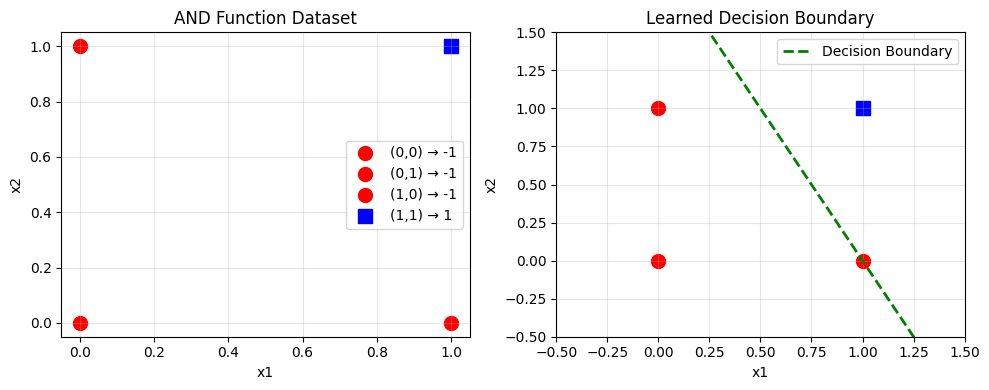

In [31]:
# Visualization of AND function and decision boundary
plt.figure(figsize=(10, 4))

# Plot 1: Data points
plt.subplot(1, 2, 1)
colors = ['red' if label == -1 else 'blue' for label in y_and]
markers = ['o' if label == -1 else 's' for label in y_and]

for i, (point, color, marker) in enumerate(zip(X_and, colors, markers)):
    plt.scatter(point[0], point[1], c=color, marker=marker, s=100, 
                label=f'({point[0]},{point[1]}) → {y_and[i]}')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('AND Function Dataset')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 2: Decision boundary
plt.subplot(1, 2, 2)
# Plot data points
for i, (point, color, marker) in enumerate(zip(X_and, colors, markers)):
    plt.scatter(point[0], point[1], c=color, marker=marker, s=100)

# Draw decision boundary: w1*x1 + w2*x2 + b = 0
x1_range = np.linspace(-0.5, 1.5, 100)
if final_w[1] != 0:  # Avoid division by zero
    x2_boundary = -(final_w[0] * x1_range + final_b) / final_w[1]
    plt.plot(x1_range, x2_boundary, 'g--', linewidth=2, label='Decision Boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Learned Decision Boundary')
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.legend()

plt.tight_layout()
plt.show()

## **Question 2: Boolean Functions Learnable by Perceptron**

**Answer:** Out of the 16 possible boolean functions over 2-bit binary input, exactly **14 functions are learnable** by a Perceptron, while **2 functions are not learnable**. The key insight is that a Perceptron can only learn linearly separable functions.

**Analysis:**
• For 2-bit input (x1, x2), we have 4 possible input combinations: (0,0), (0,1), (1,0), (1,1)
• Each boolean function assigns a binary output to each of these 4 inputs, giving us 2^4 = 16 total functions
• A function is linearly separable if we can draw a straight line in the 2D space to separate positive and negative examples
• The two non-learnable functions are **XOR (Exclusive OR)** and **XNOR (Exclusive NOR)** because they require non-linear decision boundaries

**Non-learnable Functions:**
• **XOR function**: Returns 1 when inputs are different, 0 when they're the same - requires diagonal separation
• **XNOR function**: Returns 1 when inputs are the same, 0 when they're different - also requires diagonal separation

Both of these functions have their positive and negative examples arranged in a checkerboard pattern that cannot be separated by any single straight line.

In [32]:
# Code Example: Analysis of All 16 Boolean Functions
import numpy as np
import matplotlib.pyplot as plt

# Define all 16 possible boolean functions
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# All 16 boolean functions (as binary strings converted to arrays)
functions = {
    'FALSE': [0, 0, 0, 0],      'NOR': [0, 0, 0, 1],
    'x1 ANDN x2': [0, 0, 1, 0], 'NOT x2': [0, 0, 1, 1],
    'x2 ANDN x1': [0, 1, 0, 0], 'NOT x1': [0, 1, 0, 1],
    'XOR': [0, 1, 1, 0],        'NAND': [0, 1, 1, 1],
    'AND': [1, 0, 0, 0],        'XNOR': [1, 0, 0, 1],
    'x1': [1, 0, 1, 0],         'x1 OR (NOT x2)': [1, 0, 1, 1],
    'x2': [1, 1, 0, 0],         '(NOT x1) OR x2': [1, 1, 0, 1],
    'OR': [1, 1, 1, 0],         'TRUE': [1, 1, 1, 1]
}

def is_linearly_separable(outputs):
    """Check if a boolean function is linearly separable"""
    X = inputs
    y = np.array([1 if out == 1 else -1 for out in outputs])
    
    # Special cases
    if len(set(y)) == 1:  # All same class
        return True
        
    # Try to find separating line by checking all possible linear combinations
    # For 2D, we need to check if we can separate positive and negative points
    pos_points = X[y == 1]
    neg_points = X[y == -1]
    
    if len(pos_points) == 0 or len(neg_points) == 0:
        return True
        
    # XOR and XNOR are known to be non-linearly separable
    if np.array_equal(outputs, [0, 1, 1, 0]) or np.array_equal(outputs, [1, 0, 0, 1]):
        return False
        
    return True

# Analyze all functions
learnable_count = 0
non_learnable = []

print("Analysis of all 16 Boolean Functions:")
print("=" * 50)

for name, outputs in functions.items():
    separable = is_linearly_separable(outputs)
    status = "✓ Learnable" if separable else "✗ Not Learnable"
    
    if separable:
        learnable_count += 1
    else:
        non_learnable.append((name, outputs))
    
    print(f"{name:15} {outputs} -> {status}")

print(f"\nSummary:")
print(f"Learnable functions: {learnable_count}/16")
print(f"Non-learnable functions: {16 - learnable_count}/16")
print(f"\nNon-learnable functions:")
for name, outputs in non_learnable:
    print(f"  {name}: {outputs}")

Analysis of all 16 Boolean Functions:
FALSE           [0, 0, 0, 0] -> ✓ Learnable
NOR             [0, 0, 0, 1] -> ✓ Learnable
x1 ANDN x2      [0, 0, 1, 0] -> ✓ Learnable
NOT x2          [0, 0, 1, 1] -> ✓ Learnable
x2 ANDN x1      [0, 1, 0, 0] -> ✓ Learnable
NOT x1          [0, 1, 0, 1] -> ✓ Learnable
XOR             [0, 1, 1, 0] -> ✗ Not Learnable
NAND            [0, 1, 1, 1] -> ✓ Learnable
AND             [1, 0, 0, 0] -> ✓ Learnable
XNOR            [1, 0, 0, 1] -> ✗ Not Learnable
x1              [1, 0, 1, 0] -> ✓ Learnable
x1 OR (NOT x2)  [1, 0, 1, 1] -> ✓ Learnable
x2              [1, 1, 0, 0] -> ✓ Learnable
(NOT x1) OR x2  [1, 1, 0, 1] -> ✓ Learnable
OR              [1, 1, 1, 0] -> ✓ Learnable
TRUE            [1, 1, 1, 1] -> ✓ Learnable

Summary:
Learnable functions: 14/16
Non-learnable functions: 2/16

Non-learnable functions:
  XOR: [0, 1, 1, 0]
  XNOR: [1, 0, 0, 1]


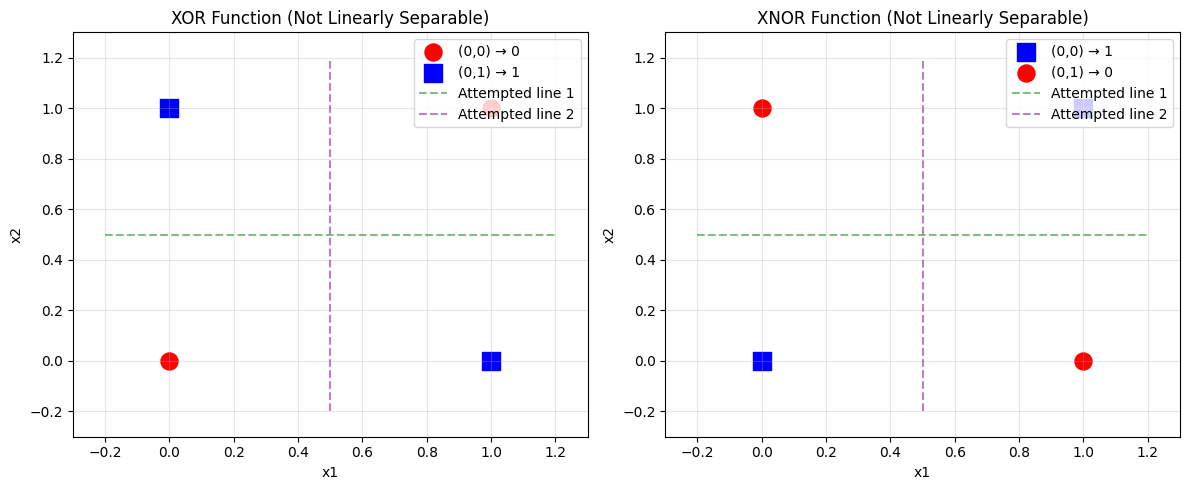


Truth Tables for Non-Learnable Functions:
XOR Truth Table:
x1 | x2 | Output
---|----|----- 
 0 |  0 |   0
 0 |  1 |   1
 1 |  0 |   1
 1 |  1 |   0

XNOR Truth Table:
x1 | x2 | Output
---|----|----- 
 0 |  0 |   1
 0 |  1 |   0
 1 |  0 |   0
 1 |  1 |   1


In [33]:
# Visualization: Why XOR and XNOR are not linearly separable
plt.figure(figsize=(12, 5))

# XOR visualization
plt.subplot(1, 2, 1)
xor_outputs = [0, 1, 1, 0]
colors_xor = ['red' if out == 0 else 'blue' for out in xor_outputs]
markers_xor = ['o' if out == 0 else 's' for out in xor_outputs]

for i, (point, color, marker, output) in enumerate(zip(inputs, colors_xor, markers_xor, xor_outputs)):
    plt.scatter(point[0], point[1], c=color, marker=marker, s=150, 
                label=f'({point[0]},{point[1]}) → {output}' if i < 2 else '')

# Try to show that no single line can separate XOR
plt.plot([-0.2, 1.2], [0.5, 0.5], 'g--', alpha=0.5, label='Attempted line 1')
plt.plot([0.5, 0.5], [-0.2, 1.2], 'purple', linestyle='--', alpha=0.5, label='Attempted line 2')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR Function (Not Linearly Separable)')
plt.grid(True, alpha=0.3)
plt.xlim(-0.3, 1.3)
plt.ylim(-0.3, 1.3)
plt.legend()

# XNOR visualization  
plt.subplot(1, 2, 2)
xnor_outputs = [1, 0, 0, 1]
colors_xnor = ['red' if out == 0 else 'blue' for out in xnor_outputs]
markers_xnor = ['o' if out == 0 else 's' for out in xnor_outputs]

for i, (point, color, marker, output) in enumerate(zip(inputs, colors_xnor, markers_xnor, xnor_outputs)):
    plt.scatter(point[0], point[1], c=color, marker=marker, s=150,
                label=f'({point[0]},{point[1]}) → {output}' if i < 2 else '')

# Show the checkerboard pattern
plt.plot([-0.2, 1.2], [0.5, 0.5], 'g--', alpha=0.5, label='Attempted line 1')
plt.plot([0.5, 0.5], [-0.2, 1.2], 'purple', linestyle='--', alpha=0.5, label='Attempted line 2')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XNOR Function (Not Linearly Separable)')
plt.grid(True, alpha=0.3)
plt.xlim(-0.3, 1.3)
plt.ylim(-0.3, 1.3)
plt.legend()

plt.tight_layout()
plt.show()

print("\nTruth Tables for Non-Learnable Functions:")
print("="*45)
print("XOR Truth Table:")
print("x1 | x2 | Output")
print("---|----|----- ")
for i, (x1, x2) in enumerate(inputs):
    print(f" {x1} |  {x2} |   {xor_outputs[i]}")

print("\nXNOR Truth Table:")
print("x1 | x2 | Output")
print("---|----|----- ")
for i, (x1, x2) in enumerate(inputs):
    print(f" {x1} |  {x2} |   {xnor_outputs[i]}")